# Assignment 2 - Normalization Methods

## a. Generate 3 Variables, 10000 Samples Each
1. **B (Gaussian Distribution)**: Mean = 5, Standard Deviation = 2  
   Use `numpy.random.normal(loc=5, scale=2, size=10000)`  
2. **I (Power Law Distribution)**: Use `scipy.stats.powerlaw.rvs(a=0.3, size=10000)`  
3. **H (Geometric Distribution)**: Probability = 0.005  
   Use `numpy.random.geometric(p=0.005, size=10000)`

---

## b. Compare Variables in a Single Box Plot
- Plot all three variables in a single box plot using libraries such as `matplotlib` or `seaborn`.

---

## c. Apply Normalization Methods
### i. Divide Each Variable by Its Maximum
- Normalize each variable by dividing all its values by the maximum value of the respective variable.

### ii. Divide Each Variable by the Sum of Its Values
- Normalize by dividing all values of a variable by the sum of its values.

### iii. Convert Each Variable into Z-Scores
- Use the formula:  
  ```
  Z = (X - μ)/σ
  - X is your original value
  - μ (mean) measures the center of your data
  - σ (standard deviation) measures how spread out your data is
  - The resulting Z tells you how many standard deviations away from the mean each value is
  ```

### iv. Convert Each Variable into Percentiles
- Convert values into percentiles using cumulative distribution.

### v. Make Medians of All Variables the Same
1. Calculate the median of each variable.
2. Calculate the mean of these medians `m1`.
3. Generate a multiplier for each variable so that its median becomes `m1`.
4. Apply the multiplier to each variable.

### vi. Quantile Normalize the Data
- Use an off-the-shelf library function, such as `sklearn.preprocessing.quantile_transform`.

---

## d. Compare Normalization Methods
### i. Compare Original Distribution with Normalized Versions
- For each normalization method, plot the original variable and its normalized version on the same histogram.

### ii. Compare All Normalized Variables in a Single Box Plot
- Plot all normalized variables in a single box plot for each normalization method.

---

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pandas as pd


In [29]:
np.random.seed(42)

In [40]:
sample_no = 10000

``Gaussian``

In [41]:
B = np.random.normal(loc = 5 ,scale = 2,size = sample_no)

`` Power law ``

In [42]:
I = stats.powerlaw.rvs(a=0.3, size=sample_no)


``Geometric``

In [43]:
H = stats.geom.rvs(p=0.005, size=sample_no)

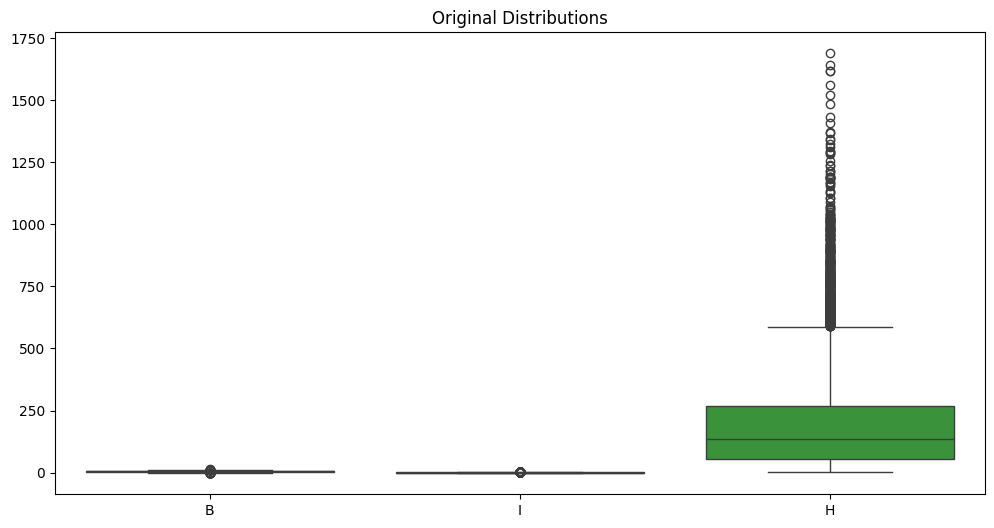

In [44]:
plt.figure(figsize=(12, 6))
data_dict = {'B': B, 'I': I, 'H': H}
sns.boxplot(data=data_dict)
plt.title('Original Distributions')
plt.show()


``Normalisation``

In [45]:
def normalize_and_plot(data_dict, method_name, normalize_func):
    # Apply normalization
    normalized_data = {k: normalize_func(v) for k, v in data_dict.items()}
    
    # Plot original vs normalized for each variable
    fig, axes = plt.subplots(3, 1, figsize=(12, 12))
    fig.suptitle(f'{method_name} Normalization')
    
    for idx, (name, data) in enumerate(data_dict.items()):
        sns.histplot(data=data, label='Original', ax=axes[idx], alpha=0.5)
        sns.histplot(data=normalized_data[name], label='Normalized', ax=axes[idx], alpha=0.5)
        axes[idx].set_title(f'Variable {name}')
        axes[idx].legend()
    
    plt.tight_layout()
    plt.show()
    
    # Boxplot of normalized variables
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=normalized_data)
    plt.title(f'{method_name} Normalized Distributions')
    plt.show()
    
    return normalized_data


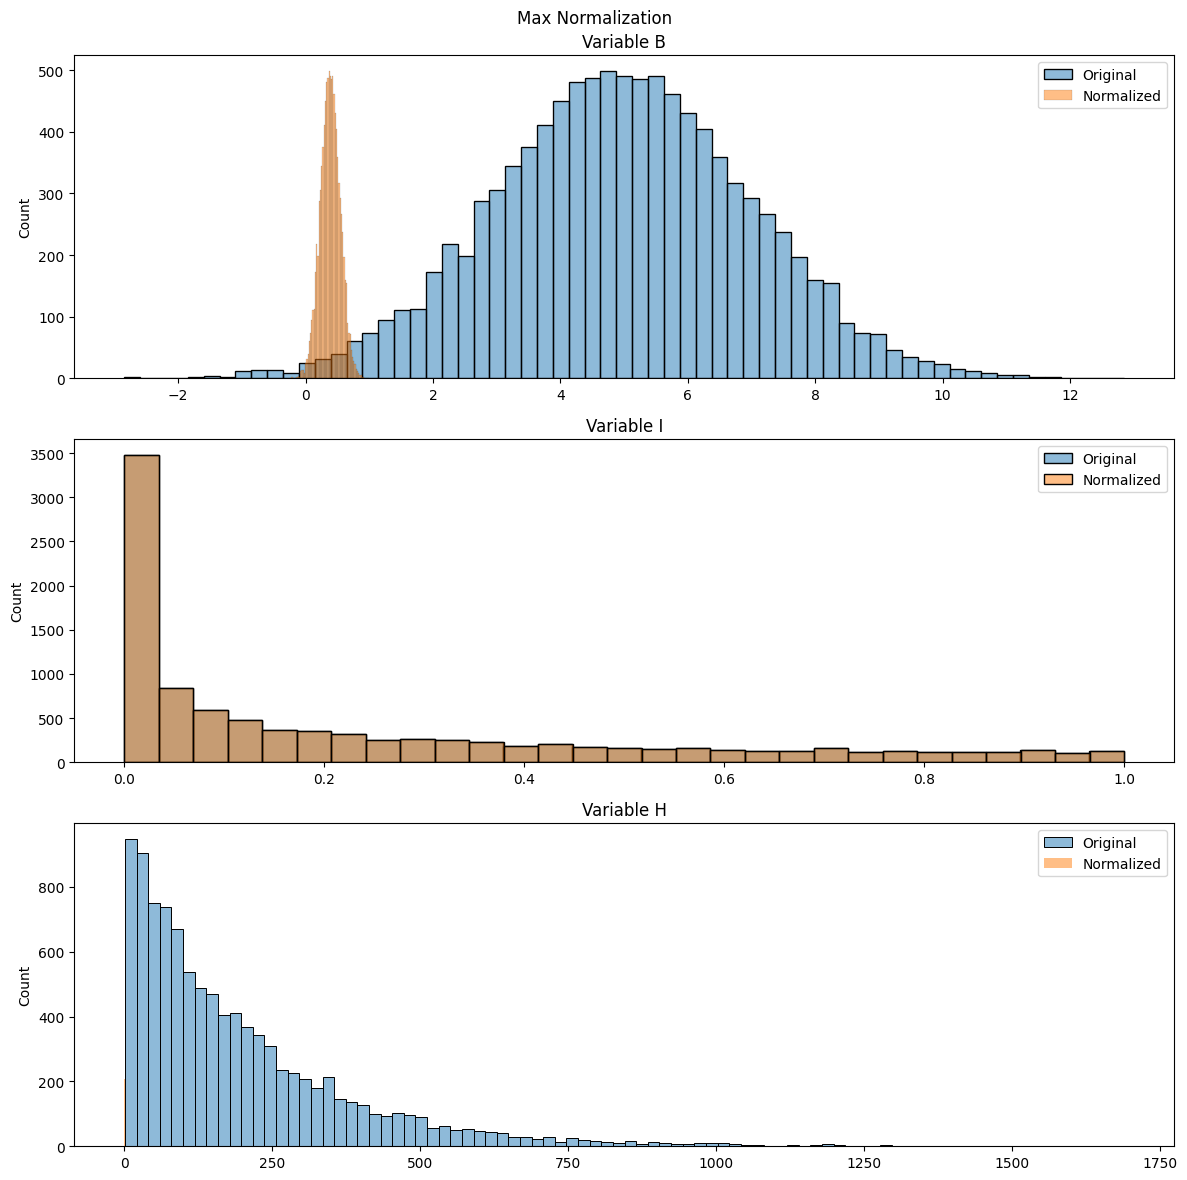

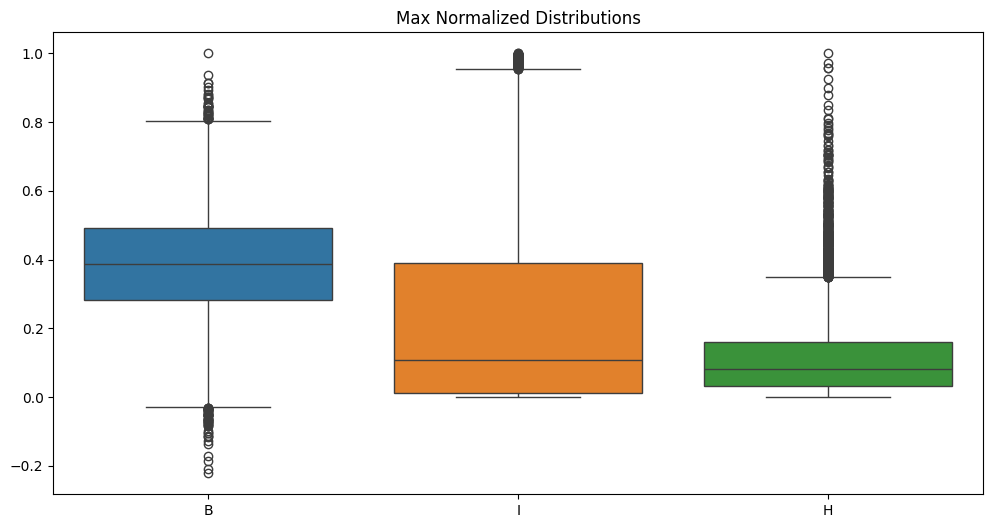

In [46]:

# 1. Max normalization
max_norm = lambda x: x / np.max(x)
max_normalized = normalize_and_plot(data_dict, 'Max', max_norm)


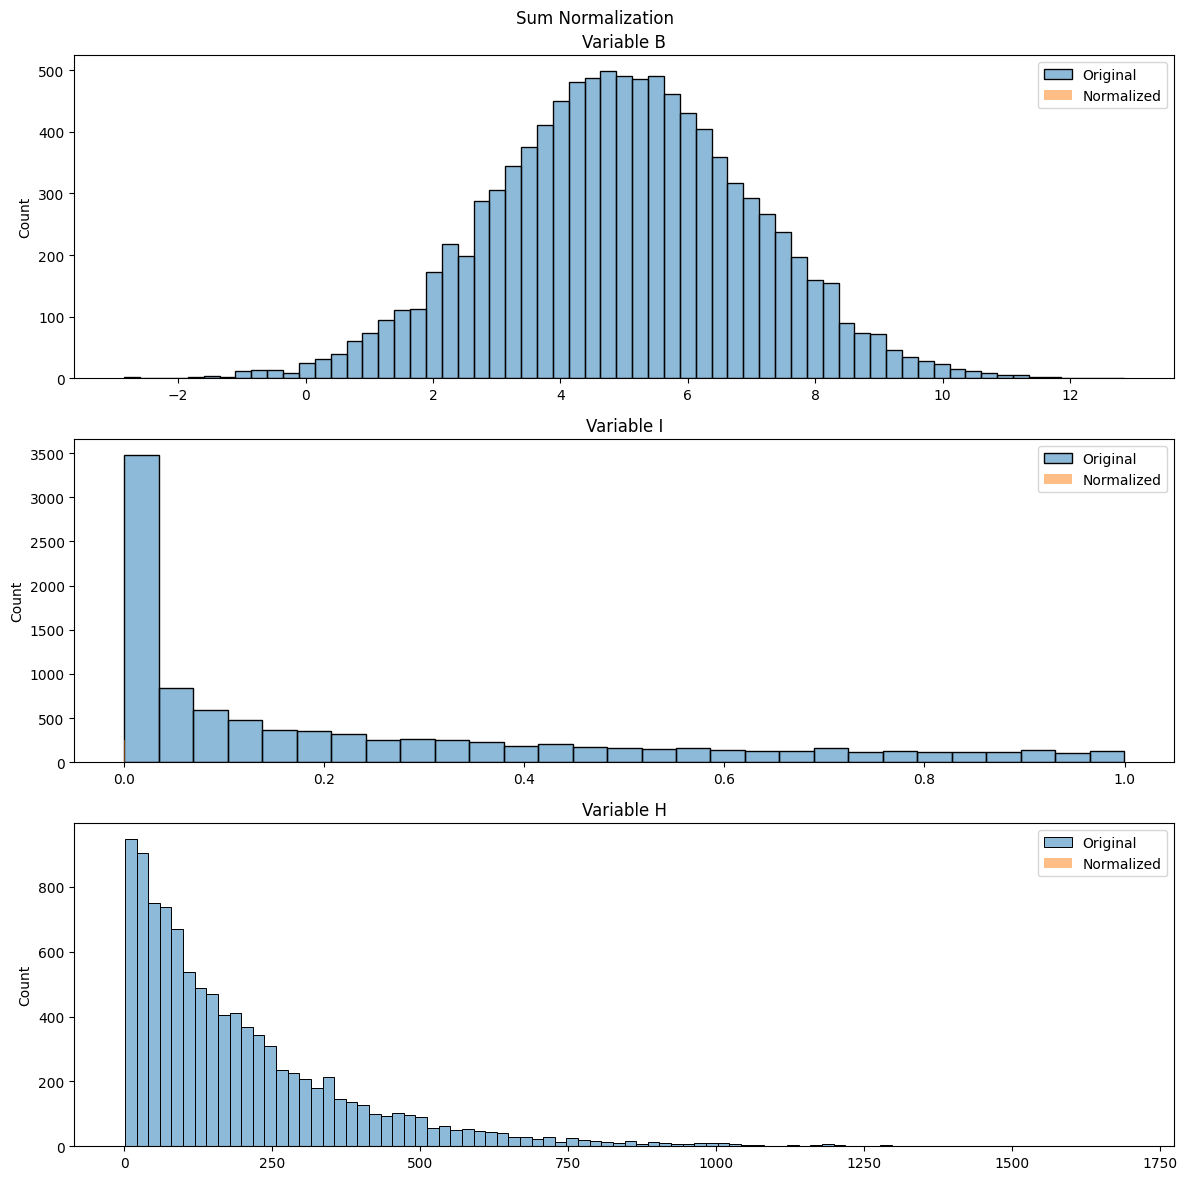

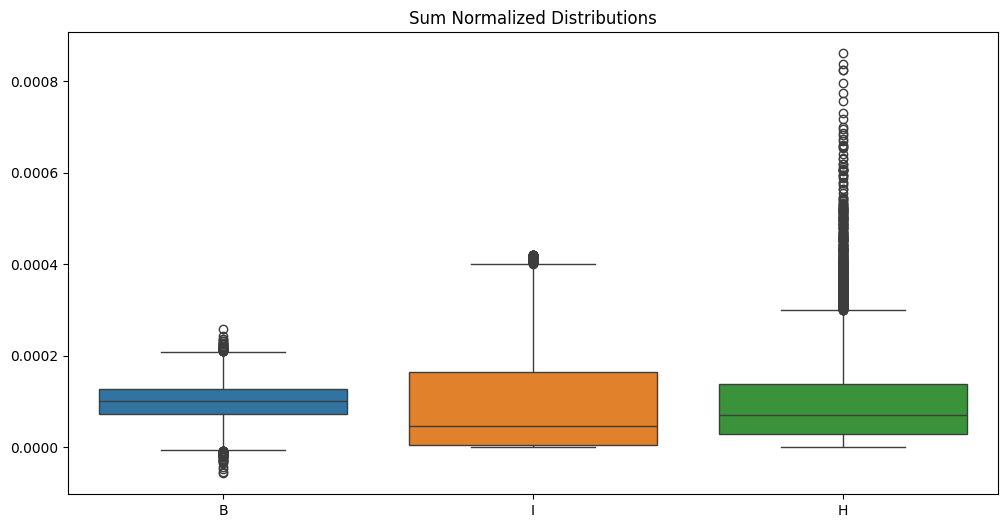

In [47]:
# 2. Sum normalization
sum_norm = lambda x: x / np.sum(x)
sum_normalized = normalize_and_plot(data_dict, 'Sum', sum_norm)

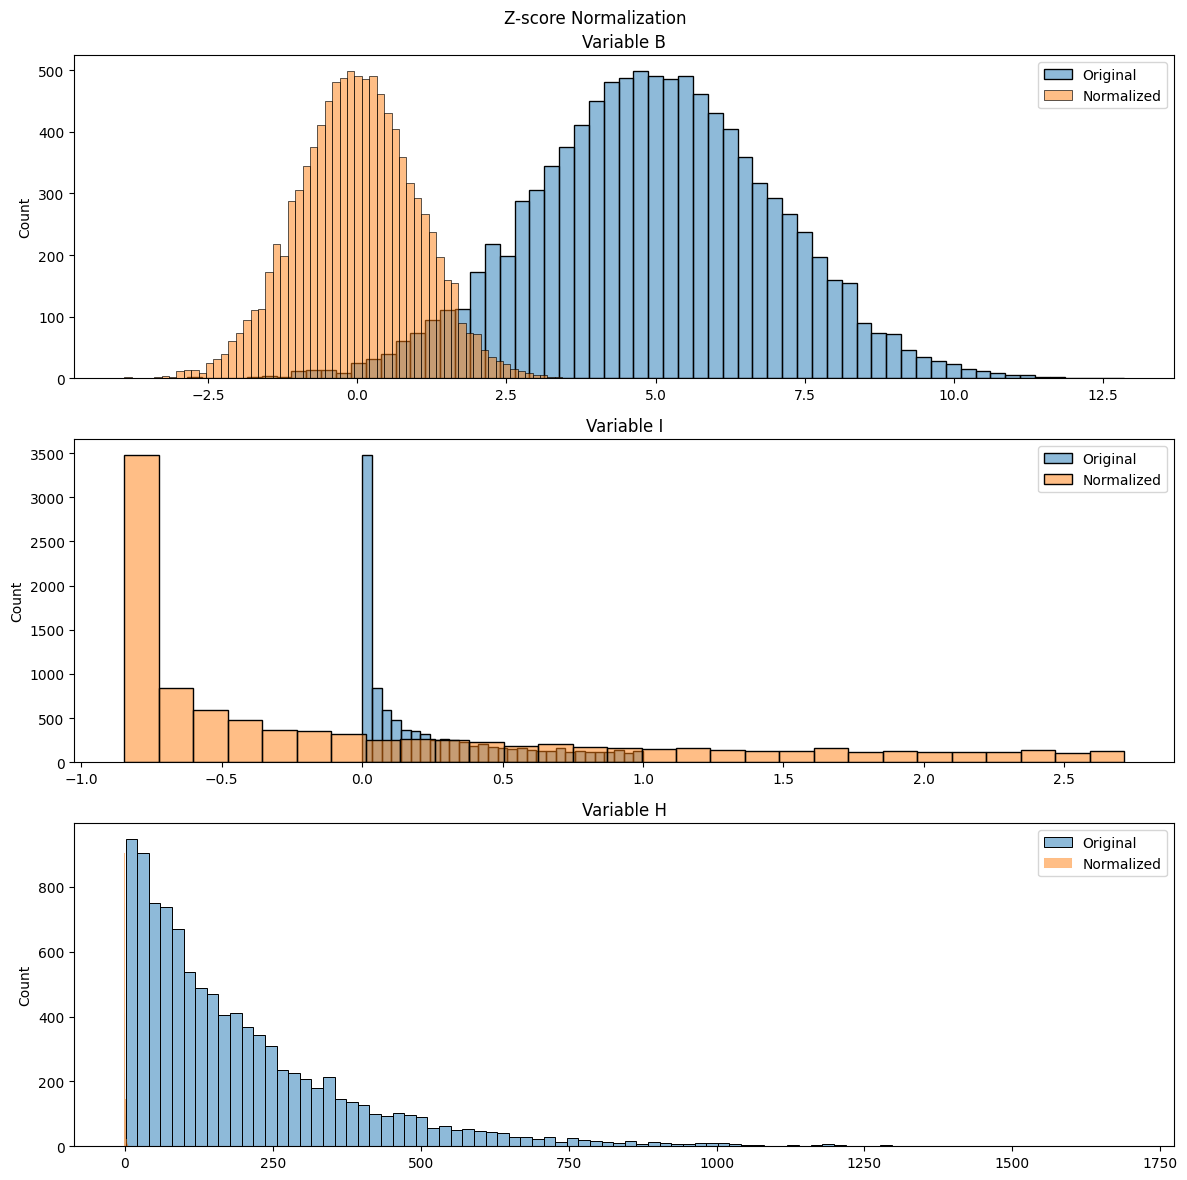

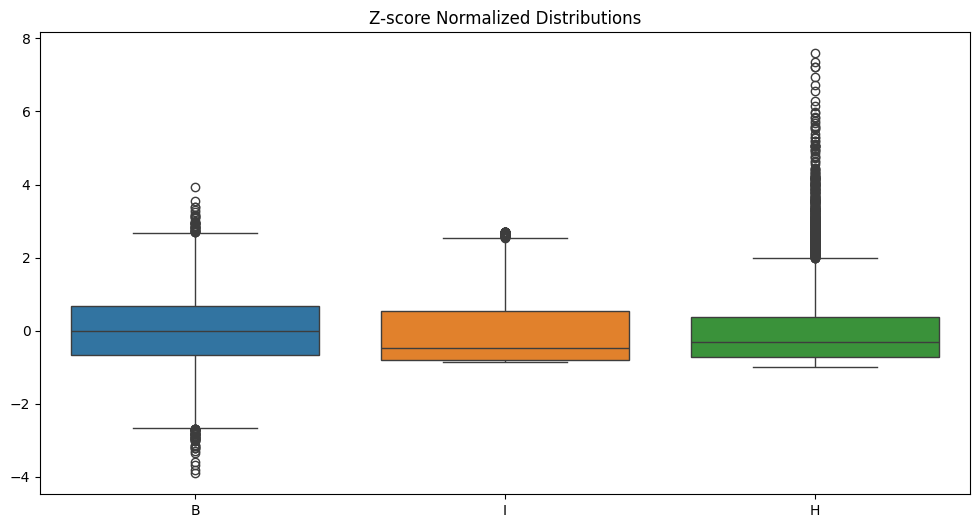

In [48]:
# 3. Z-score normalization
zscore_norm = lambda x: (x - np.mean(x)) / np.std(x)
zscore_normalized = normalize_and_plot(data_dict, 'Z-score', zscore_norm)

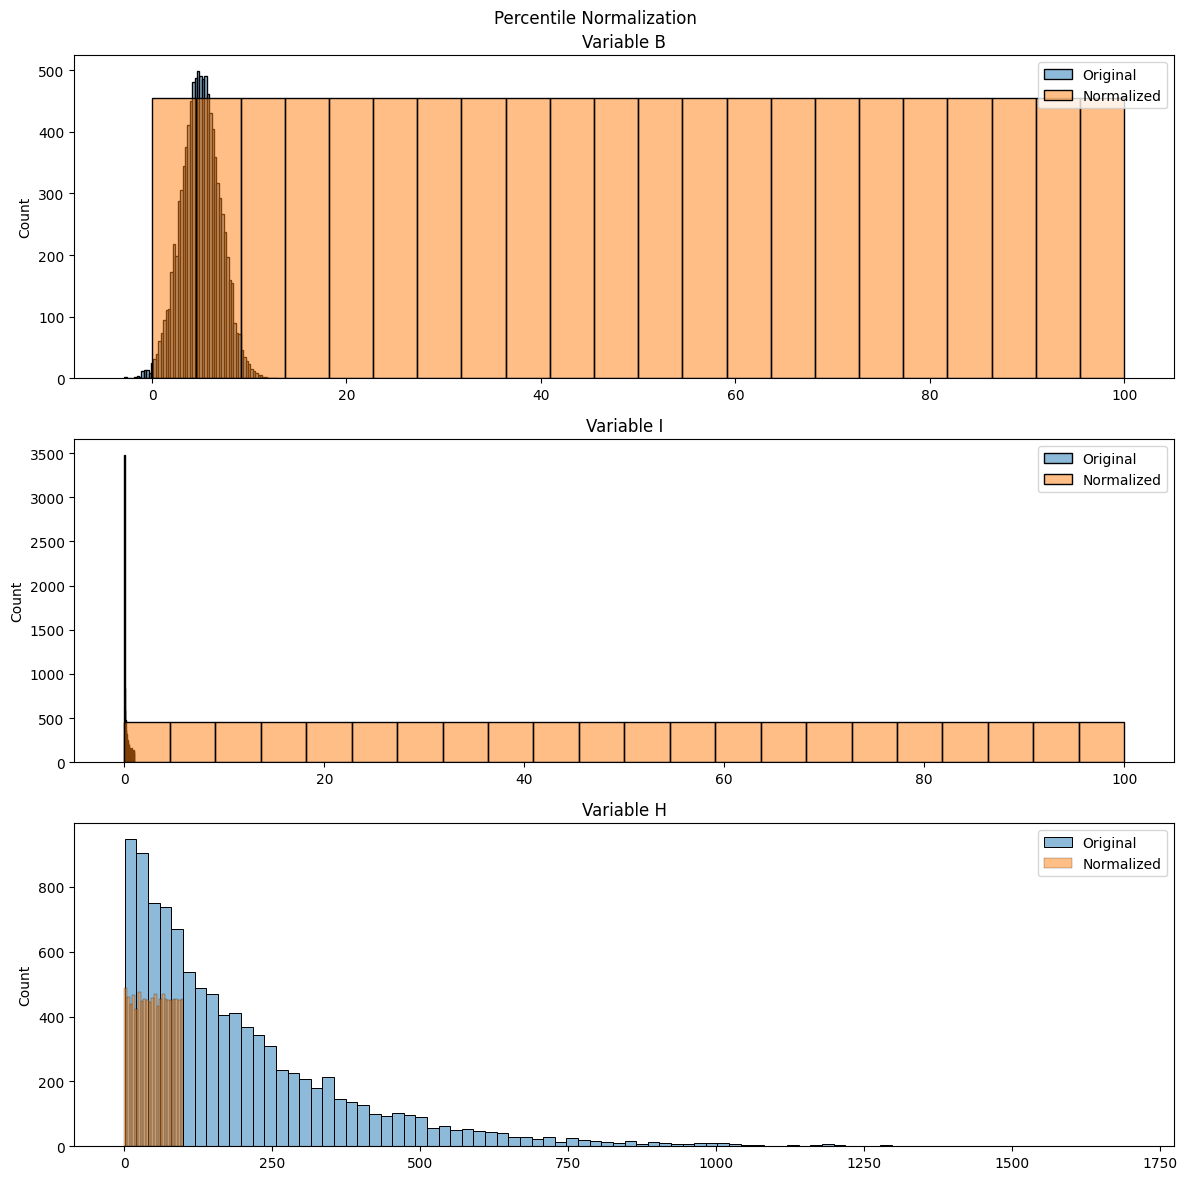

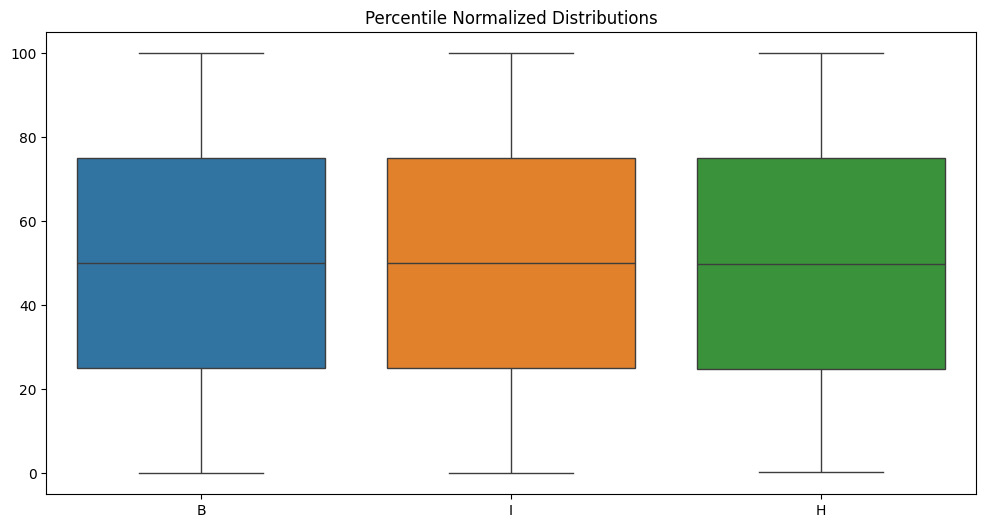

In [49]:
# 4. Percentile normalization
percentile_norm = lambda x: stats.rankdata(x) / len(x) * 100
percentile_normalized = normalize_and_plot(data_dict, 'Percentile', percentile_norm)